# Visualization of training results

This notebook uses the saved training data and shows the results visually for further analysis. I tried to follow the guidelines from [this](http://rll.berkeley.edu/deeprlcourse/docs/plotting_handout.pdf) handout of the cs294 DeepRL course from UCBerkeley, in which it gives various suggestions for storing training data, making visualizations, etc..

Following these suggestions, the method used for making visualizations of the training results is as follows:

* Saving training results into tensorboard runs and then export them to .csv files for later plotting.
* Loading the results from the saved .csv files (logger.py) after all training runs have been made (various runs with same hyperparameters, and also with two different seeds)
* Visualizing the results (this notebook) using std plots of the various saved statistics.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import logger
import plotter

from IPython.core.debugger import set_trace

%matplotlib inline

## Plot single training runs

This part deals with the visualization of single runs (for testing purposes). There is going to be at least one training
session .pkl file in the repo (and perhaps no more, as each weights ~ 10MB).

* First, let's define some helper functions to visualize single runs:

In [2]:
# folder where all runs are located (exported csv files from tensorboard)
BASE_FOLDER = os.path.join( os.getcwd(), 'results/csv' )

# a helper to plot a training series
def plotSeries( series, 
                color = 'r', 
                title = '', 
                linestyle = '-', 
                fig = None, 
                axes = None, 
                isScore = True ) :
    # iteration indices (recall, smoothed start at step 100)
    _steps = series[0]
    _data = series[1]
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
    
    axes.grid( True )
    axes.plot( _steps, _data, color = color, linestyle = linestyle )
    axes.set_title( title )
    
    # if scores plot, then plot the requirement
    if isScore :
        axes.axhline( 30., linestyle = '--' )
    
    return fig, axes

# a helper to plot the results of a run
def plotSingleRun( sessionId, title = 'Scores during training', showAll = True, fig = None, axes = None, useRandomColor = False ) :
    # path to .csv file (from sessionId)
    _filepathAll = os.path.join( BASE_FOLDER, 'run_' + sessionId + '_tensorboard_summary_mean_score.csv' )
    _filepathAvg = os.path.join( BASE_FOLDER, 'run_' + sessionId + '_tensorboard_summary_mean_score_window.csv'  )
    
    # load all training results
    _seriesAll = logger.loadTrainingResultsCsv( _filepathAll )
    _seriesAvg = logger.loadTrainingResultsCsv( _filepathAvg )
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
    
    # plot all results available
    if showAll :
        fig, axes = plotSeries( _seriesAll, 
                                color = 'b' if not useRandomColor else np.random.rand( 3, ), 
                                title = title,
                                fig = fig,
                                axes = axes )
        
    fig, axes = plotSeries( _seriesAvg, 
                            color = 'r' if not useRandomColor else np.random.rand( 3, ), 
                            title = title,
                            fig = fig,
                            axes = axes,
                            linestyle = '-')
    
    axes.set_xlabel( 'Episodes' )
    axes.set_ylabel( 'Score' )
    
    return fig, axes

* Plot some of the results of the *submission* training sessions

    * All submissions sessions have the pattern: **banana\_submission\_run\_{run}\_pytorch\_seed\_{seed}**
    * All experiment-1 sessions have the pattern: **banana\_hypertests\_config\_1\_{1|2}\_run\_{run}\_pytorch\_seed\_{seed}**


In [ ]:
# plotting a single run from the submissions sessions (using gradient clipping)
plotSingleRun( 'session_submission_seed_0', title = 'Scores - submission (with clipping)' )

# plotting a single run from the submissions sessions (not using gradient clipping)
plotSingleRun( 'session_submission_no_clip_seed_0', title = 'Scores - submission (no clipping)' )

* Plot some of the results of experiment 1.1 (batchnorm + clipping)

    * All experiment-1.1 sessions have the pattern: **session\_submission\_seed\_{seed}**


In [ ]:
# plotting a single run from the experiment-1.1 sessions (seed=0)
plotSingleRun( 'session_submission_seed_0', title = 'Scores - experiment 1.1 - seed=0' )

# plotting a single run from the experiment-1.1 sessions (seed=1)
plotSingleRun( 'session_submission_seed_1', title = 'Scores - experiment 1.1 - seed=1' )

* Plot some of the results of experiment 1.2 (batchnorm + no-clipping)

    * All experiment-1.1 sessions have the pattern: **session\_submission\_no\_clip\_seed\_{seed}**


In [ ]:
# plotting a single run from the experiment-1.2 sessions (seed=0)
plotSingleRun( 'session_submission_no_clip_seed_0', title = 'Scores - experiment 1.2 - seed=0' )

# plotting a single run from the experiment-1.2 sessions (seed=1)
plotSingleRun( 'session_submission_no_clip_seed_1', title = 'Scores - experiment 1.2 - seed=1' )

* Plot some of the results of experiment 2.1 (no-batchnorm + clipping)

    * All experiment-1.1 sessions have the pattern: **session\_submission\_no\_batchnorm\_seed\_{seed}**


In [ ]:
# plotting a single run from the experiment-2.1 sessions (seed=0)
plotSingleRun( 'session_submission_no_batchnorm_seed_0', title = 'Scores - experiment 2.1 - seed=0' )

# plotting a single run from the experiment-2.1 sessions (seed=1)
plotSingleRun( 'session_submission_no_batchnorm_seed_1', title = 'Scores - experiment 2.1 - seed=1' )

* Plot some of the results of experiment 2.2 (no-batchnorm + no-clipping)

    * All experiment-1.1 sessions have the pattern: **session\_submission\_no\_batchnorm\_no\_clip\_seed\_{seed}**


In [ ]:
# plotting a single run from the experiment-2.2 sessions (seed=0)
plotSingleRun( 'session_submission_no_batchnorm_no_clip_seed_0', title = 'Scores - experiment 2.2 - seed=0' )

# plotting a single run from the experiment-2.2 sessions (seed=1)
plotSingleRun( 'session_submission_no_batchnorm_no_clip_seed_1', title = 'Scores - experiment 2.2 - seed=1' )

* Plotting (running averages) all runs into one graph (exp. 1.1 + exp. 1.2)

In [ ]:
# plotting all runs from the submissions sessions (exp. 1.1)
fig, axes = None, None
for seed in [0,1,2,3,4,5] :
    fig, axes = plotSingleRun( 'session_submission_seed_' + str(seed), 
                               title = 'Scores - all runs in submission (exp. 1.1) - seed %s' % str(seed), 
                               fig = fig, 
                               axes = axes, 
                               showAll = False,
                               useRandomColor = True )

# plotting a single run from the submissions sessions (exp. 1.2)
fig, axes = None, None
for seed in [0,1,2,3,4,5] :
    fig, axes = plotSingleRun( 'session_submission_no_clip_seed_' + str(seed), 
                               title = 'Scores - all runs in submission (exp. 1.2) - seed %s' % str(seed), 
                               fig = fig, 
                               axes = axes, 
                               showAll = False,
                               useRandomColor = True )

* Plotting (running averages) all runs into one graph (exp. 2.1 + exp. 2.2)

In [ ]:
# plotting all runs from the submissions sessions (exp. 2.1)
fig, axes = None, None
for seed in [0,1,2,3,4,5] :
    fig, axes = plotSingleRun( 'session_submission_no_batchnorm_no_clip_seed_' + str(seed), 
                               title = 'Scores - all runs in submission (exp. 2.1) - seed %s' % str(seed), 
                               fig = fig, 
                               axes = axes, 
                               showAll = False,
                               useRandomColor = True )

# plotting a single run from the submissions sessions (exp. 2.2)
fig, axes = None, None
for seed in [0,1,2,3,4,5] :
    fig, axes = plotSingleRun( 'session_submission_no_batchnorm_no_clip_seed_' + str(seed), 
                               title = 'Scores - all runs in submission (exp. 2.2) - seed %s' % str(seed), 
                               fig = fig, 
                               axes = axes, 
                               showAll = False,
                               useRandomColor = True )

## Plotting various runs using std-plots

We run multiple training **sessions** with different configurations and group them in **experiments**. The results in this section will consist on std-plots with regions shaded to represent standard deviation over runs over same experiment, and the mean shown as a single strong lineplot in between.

The experiments for which we have various runs consists of the following:

1. Experiment 1.1 : Batchnorm + gradient clipping
2. Experiment 1.2 : Batchnorm + NO gradient clipping
3. Experiment 2.1 : NO Batchnorm + gradient clipping
4. Experiment 2.2 : NO Batchnorm + NO gradient clipping

* First, let's define a helper functions to load all runs for one configuration. Recall that all experiments have a common base name, given as follows:

    * Submission   : banana\_submission\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1,2}
    * Experiment-1 : banana\_hypertests\_config\_1\_{1,2}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}
    * Experiment-2 : banana\_improvements\_config\_2\_{1,2,3}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}
    * Experiment-3 : banana\_exploration\_config\_3\_{1,2}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}

In [3]:
# same common loader function, as the experiments have ...
# a common naming-structure along experiments
#
# session_submission_[no_batchnorm_][no_clip_]seed_{seed}
#

from itertools import product
from IPython.core.debugger import set_trace

def loadExperimentResults( batchnorm = [1], clipping = [1], seeds = [0,1,2,3,4,5] ) :
    _BATCHNORM_FLAGS = { 1 : '', 2: 'no_batchnorm_' }
    _CLIPPING_FLAGS = { 1 : '', 2: 'no_clip_' }
    _sessionsResults = { 'scoresAvg' : [],
                         'scoresAll' : [] }
    
    _minLenAll = 10000000
    _minLenAvg = 10000000
    
    for sessBatchnormFlag, sessClippingFlag, sessSeed in product( batchnorm, clipping, seeds ) :
        _sessionName = 'session_submission_' + \
                       _BATCHNORM_FLAGS[sessBatchnormFlag] + \
                       _CLIPPING_FLAGS[sessClippingFlag] + \
                       'seed_' + str(sessSeed)
        
        _resultsFilepathAll = os.path.join( BASE_FOLDER, 'run_' + _sessionName + '_tensorboard_summary_mean_score.csv' )
        _resultsFilepathAvg = os.path.join( BASE_FOLDER, 'run_' + _sessionName + '_tensorboard_summary_mean_score_window.csv' )
        
        _resultsAll = logger.loadTrainingResultsCsv( _resultsFilepathAll )
        _resultsAvg = logger.loadTrainingResultsCsv( _resultsFilepathAvg )

        _minLenAll = min( len( _resultsAll[1] ), int( _minLenAll ) )
        _minLenAvg = min( len( _resultsAvg[1] ), int( _minLenAvg ) )
        
        _sessionsResults['scoresAvg'].append( _resultsAvg[1] )
        _sessionsResults['scoresAll'].append( _resultsAll[1] )

    # normalize to min-length, as some runs are missing a few data points
    for i in range( len( _sessionsResults['scoresAll'] ) ):
        _sessionsResults['scoresAll'][i] = _sessionsResults['scoresAll'][i][:_minLenAll]
    for i in range( len( _sessionsResults['scoresAvg'] ) ):
        _sessionsResults['scoresAvg'][i] = _sessionsResults['scoresAvg'][i][:_minLenAvg]
        
        
    return _sessionsResults

* Std-plots for the **submission** runs

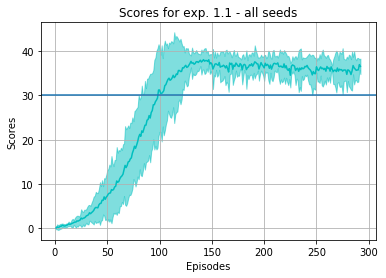

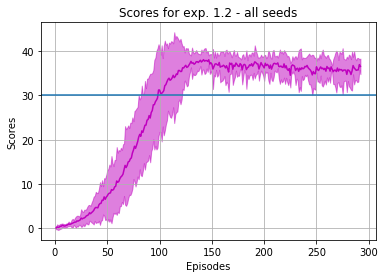

In [12]:
# plotting all runs from exp. 1.1 sessions (batchnorm + clipping)
seeds = [0,1,2,3,4,5]
_submissionResults = loadExperimentResults( batchnorm = [1], clipping = [1], seeds = seeds )
axes = plotter.drawStdPlot( _submissionResults['scoresAll'], 
                            title = 'Scores for exp. 1.1 - all seeds',
                            xlabel = 'Episodes',
                            ylabel = 'Scores',
                            color = 'c' )

axes.grid( True )
axes.axhline( 30. )

# plotting all runs from exp. 1.2 sessions (batchnorm + NO clipping)
seeds = [0,1,2,3,4,5]
_submissionResults = loadExperimentResults( batchnorm = [1], clipping = [2], seeds = seeds )
axes = plotter.drawStdPlot( _submissionResults['scoresAll'], 
                            title = 'Scores for exp. 1.2 - all seeds',
                            xlabel = 'Episodes',
                            ylabel = 'Scores',
                            color = 'm',
                            axes = None )

axes.grid( True )
axes.axhline( 30. )

* Std-plots for the **experiment-1** runs

In [ ]:
# plotting all runs from the experiment-1 sessions (seed 0)
fig, axes = None, None
colors = ['r','g','b']
for i, config in enumerate( [1,2] ) :
    _experiment1ResultsSeed0 = loadExperimentResults( 'hypertests', 1, [config], [0,1,2,3,4], [0] )
    axes = plotter.drawStdPlot( _experiment1ResultsSeed0['scoresAvg'], 
                                title = 'Scores for experiment 1 - seed 0',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Moderate exploration', 'Less exploration'] )

# plotting all runs from the experiment-1 sessions (seed1)
fig, axes = None, None
colors = ['r','g','b']
for i, config in enumerate( [1,2] ) :
    _experiment1ResultsSeed1 = loadExperimentResults( 'hypertests', 1, [config], [0,1,2,3,4], [1] )
    axes = plotter.drawStdPlot( _experiment1ResultsSeed1['scoresAvg'], 
                                title = 'Scores for experiment 1 - seed 1',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Moderate exploration', 'Less exploration'] )

* Std-plots for the **experiment-2** runs

In [ ]:
# plotting all runs from the experiment-2 sessions (seed 0)
fig, axes = None, None
colors = ['r','g','b','k']
for i, config in enumerate( [0,1,2,3] ) :
    if i == 0 :
        _experiment2ResultsSeed0 = loadExperimentResults( 'hypertests', 1, [1], [0,1,2,3,4], [0] )
    else :
        _experiment2ResultsSeed0 = loadExperimentResults( 'improvements', 2, [config], [0,1,2,3,4], [0] )
    axes = plotter.drawStdPlot( _experiment2ResultsSeed0['scoresAvg'], 
                                title = 'Scores for experiment 2 - seed 0',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Vanilla', 'DDQN', 'PER', 'DDQN + PER'] )

# plotting all runs from the experiment-2 sessions (seed 1)
fig, axes = None, None
colors = ['r','g','b','k']
for i, config in enumerate( [0,1,2,3] ) :
    if i == 0 :
        _experiment2ResultsSeed1 = loadExperimentResults( 'hypertests', 1, [1], [0,1,2,3,4], [1] )
    else :
        _experiment2ResultsSeed1 = loadExperimentResults( 'improvements', 2, [config], [0,1,2,3,4], [1] )
    axes = plotter.drawStdPlot( _experiment2ResultsSeed1['scoresAvg'], 
                                title = 'Scores for experiment 2 - seed 1',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Vanilla', 'DDQN', 'PER', 'DDQN + PER'] )

* Std-plots for the **experiment-3** runs

In [ ]:
# plotting all runs from the experiment-3 sessions (seed 0)
fig, axes = None, None
colors = ['r','g','b']
for i, config in enumerate( [1,2] ) :
    _experiment3ResultsSeed0 = loadExperimentResults( 'exploration', 3, [config], [0,1,2,3,4], [0] )
    axes = plotter.drawStdPlot( _experiment3ResultsSeed0['scoresAvg'], 
                                title = 'Scores for experiment 3 - seed 0',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Vanilla', 'DDQN + PER'] )

# plotting all runs from the experiment-3 sessions (seed 1)
fig, axes = None, None
colors = ['r','g','b']
for i, config in enumerate( [1,2] ) :
    _experiment3ResultsSeed1 = loadExperimentResults( 'exploration', 3, [config], [0,1,2,3,4], [1] )
    axes = plotter.drawStdPlot( _experiment3ResultsSeed1['scoresAvg'], 
                                title = 'Scores for experiment 3 - seed 1',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[i], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )
axes.legend( ['Vanilla', 'DDQN + PER'] )